# Differential Equations & Markov Chains





In [65]:
# import the numpy package in the np namespace
import numpy  as np

# this line will load the plotting function into the namespace plt.
import matplotlib.pyplot as plt

# the following lines prevent Python from opening new windows for figures. 
%matplotlib inline

## Q1: Differential Equations 

Consider the following initial value problem,

$$ \frac{dy}{dx} = x + \frac{y}{5}, \hspace{1cm} y(0) = -3 $$

1a) Write a program to apply the Euler's method to obtain the numerical (approximated) solution, with step sizes of 1, 0.2, and 0.05 on the interval [0, 5], respectively.

1b) Work out the analytical (exact) results. Plot figures to compare the numerical results to the analytical results on the interval [0, 5]. Discuss the comparison results.

### Part 1a)

In [66]:
from math import e

def eulers(y_init, x_init, x_lim, step_size ):
    """
    Calculates an estimation array of values  to a function subject to parameters and step size.
    The estimation array is returned.
    
    Arguments:
    'y_init': The initial y value to be used in the estimation.
    'x_init': The initial x value to be used in the estimation.
    'x_lim': The final x value to estimate.
    'step_size': The difference between x values used in the estimation.
    """
    
    steps = int (x_lim / step_size)    #Calculate number of steps needed.
    
    #Initialise the estimation array with the initial y value.
    estimation = np.zeros(steps + 1)
    estimation[0] = y_init
    
    #Add following estimations to the array, using Euler's estimation algorithm.
    for n in range( 0, steps ):
        
        estimation[n + 1] = estimation[n] + step_size*(x_init + estimation[n]/5 )
        x_init += step_size
        
        
    return estimation


def plot( x_min, x_max, step_size, estimation, line):
    """
    Plots an exact function, as well as estimate values on the same graph for comparison.
    
    Arguments:
    'x_min': The first x value to plot.
    'x_max': The final x value to plot.
    'step_size': The difference between each plotted x value.
    'estimation': The array of estimated values.
    'line': The type of line to draw for the estimated values.
    """
    
    x = np.linspace(x_min, x_max)
    y = -5*x - 25 + 22*np.exp(x/5)
    plt.plot(x, y)    #Plot the x and y values for the exact function.
    
    #Iterate over the estimation array Plotting the values on the same graph.
    for i in range( 0, len(estimation) ):
        plt.plot(x_min, estimation[i], line)
        plt.legend(['exact', 'numerical'], loc = 'upper left')
        plt.xlabel('$x$')
        plt.xlim(0, 5)
        plt.ylabel('$f(x)$')
        x_min += step_size


### Part 1b)

$$ \frac{dy}{dx} = x + \frac{y}{5} $$

Separate the variables to either side of the equation and rearrange to satisfy the form $\frac{dy}{dx} + P(x)y = Q(x)$.

$$ \frac{dy}{dx} - \frac{y}{5} = x $$

Where $P(x)$ is simply the constant $-\frac{1}{5}$, $Q(x) = x$, and so the integrating factor $\rho(x) = e^{\int-\frac{1}{5}dx} = e^{-\frac{x}{5}}$

Multiply both sides by the integrating factor:

$$ e^{-\frac{x}{5}}\frac{dy}{dx} - \frac{1}{5}e^{-\frac{x}{5}}y = xe^{-\frac{x}{5}} $$

Recognise the left hand side as a product of differentiation with respect to $x$:

$$ Dx[e^{-\frac{x}{5}}y] = xe^{-\frac{x}{5}} $$

Integrate both sides with respect to $x$:

$$ \int{ Dx[e^{-\frac{x}{5}}y] } = \int{ xe^{-\frac{x}{5}} }dx $$
$$ e^{-\frac{x}{5}}y = \int{ xe^{-\frac{x}{5}} }dx $$

Use By Parts to integrate the right hand side:
$$u = x \hspace{1cm} v' = e^{-\frac{x}{5}}$$
$$u' = 1 \hspace{1cm} v = -5e^{-\frac{x}{5}}$$

$$ e^{-\frac{x}{5}}y = -5xe^{-\frac{x}{5}} +5\int{ e^{-\frac{x}{5}} }dx $$
$$ e^{-\frac{x}{5}}y = -5xe^{-\frac{x}{5}} -25e^{-\frac{x}{5}} + c $$

Use the initial value (where $x$=0, $y$=-3)  to calculate the constant $c$:

$$ e^{-\frac{0}{5}}(-3) = -5(0)e^{-\frac{0}{5}} -25e^{-\frac{0}{5}} + c $$

$$ -3 = -25 + c $$

$$ c = 22 $$

Overall we now have:

$$ e^{-\frac{x}{5}}y = -5xe^{-\frac{x}{5}} -25e^{-\frac{x}{5}} + 22 $$

Simplify by dividing through by $e^{-\frac{x}{5}}$ to reach the final result of:

$$ y = -5x - 25 + 22e^{\frac{x}{5}} $$

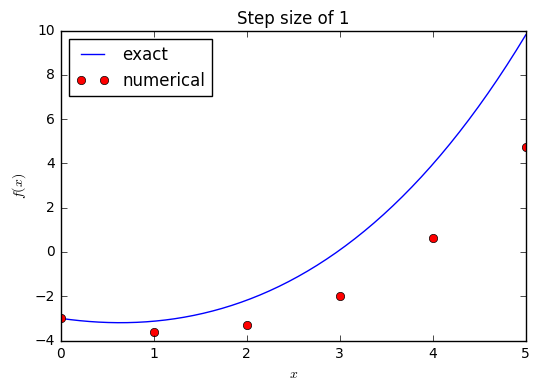

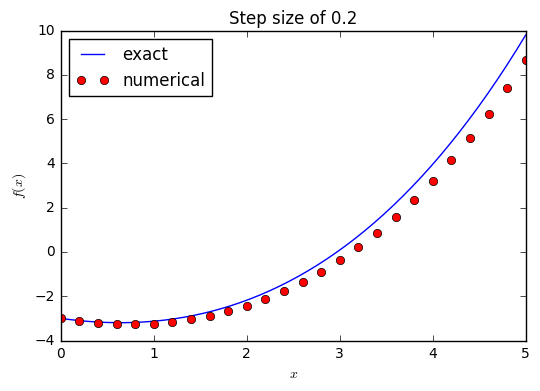

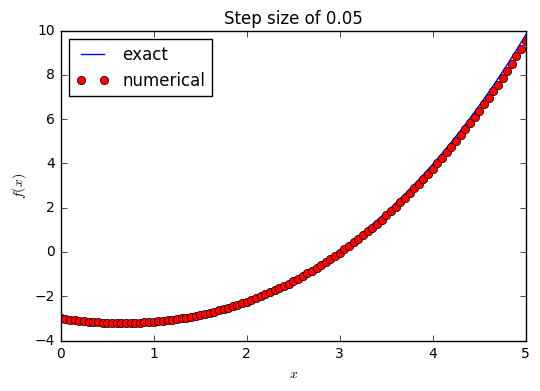

In [67]:
#Plot 3 different graphs, with the required different step sizes.
plot( 0, 5, 1, eulers(-3, 0, 5, 1), "ro")
plt.title("Step size of 1")
plt.show()
plot( 0, 5, 0.2, eulers(-3, 0, 5, 0.2), "ro")
plt.title("Step size of 0.2")
plt.show()
plot( 0, 5, 0.05, eulers(-3, 0, 5, 0.05), "ro")
plt.title("Step size of 0.05")
plt.show()

By analysing the graphs, we and clearly see that as the step size decreases, eulers formula generates a more acccurate estimate of the function. This is because there is smaller margin for error in between point calculations.

## Q2: Markov Chains


Consider the two Markov chains in the Example(2) and Example(3) of the lecture slides for Markov Chains (slide 7 and slide 8). For the Example(3), set $\alpha = 0.3$, $\beta = 0.4$ and $N = 30$. Work out the following problems for each of these two Markov chains. 

2a) Write a program to run 100 trials where each trial records the state of the markov chain after 100 moves and each trial has a random initial state. This program should draw a figure showing the percentage of trials against various states.

2b) Whether the Markov chain has a steady-state distribution? Explain your answer. Work out the steady-state distribution analytically if it exists. Draw a figure showing the steady-state probabilities against various states.

2c) If the steady-state distribution exists, compare the figures obtained in 2b) and 2a), observe any difference and explain the reason. Increase and decrease the number of trials (e.g., 200 and 50) in 2a), compare the figures obtained in 2b) and 2a) again, observe the change of difference and explain your observation.


### Part 2a)

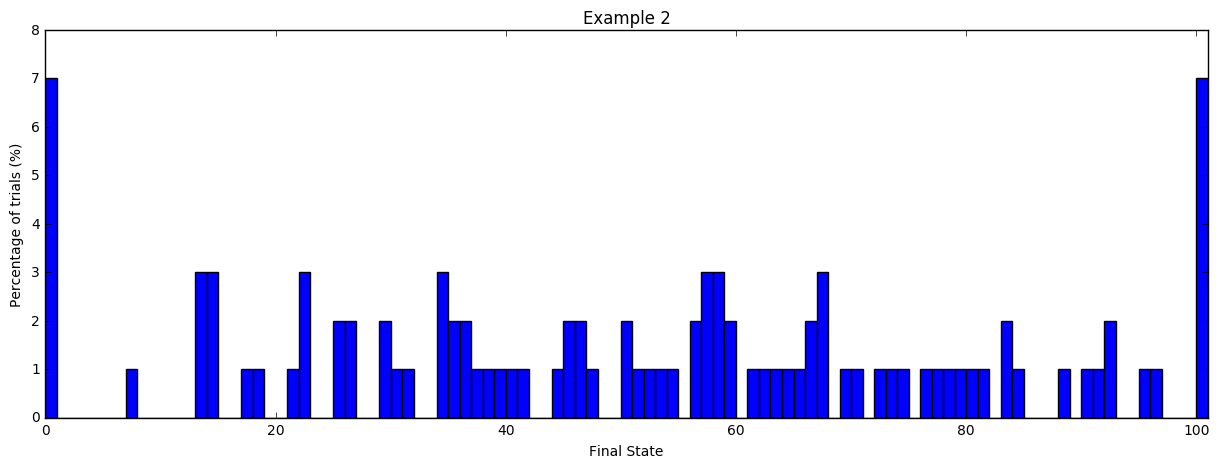

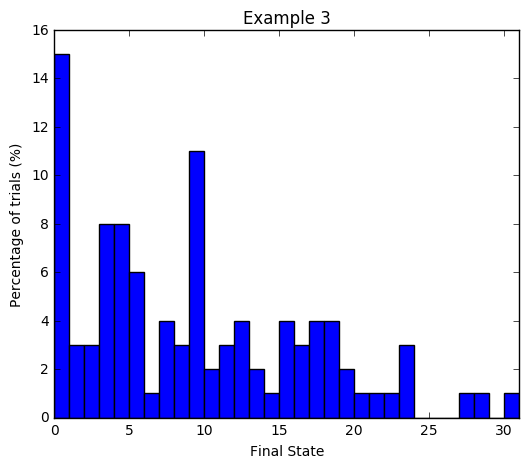

In [68]:
def transition_matrix(number_states, a, b, absorbing):
    """
    calculates a transition matrix of using probabilities for a given number of states.
    The transition matrix is returned.
    
    Arguments:
    'number_states': The number of states, not inclusive of state 0.
    'a': probability of alpha, defining probability of advancing state.
    'b': probability of beta, defining probability of lowering state.
    'absorbing': Defines whether the start and end state are absorbing or not.
    """
    
    #Initialise the transition matrix, with the correct number of states.
    transition_matrix = np.zeros( shape=( number_states+1, number_states+1 ))
    
    #General case, fill in probability values for alpha and beta at each row.
    for i in range( 0, number_states ):
        transition_matrix[i][i] = 1-a-b
        if i != 0:
            transition_matrix[i][i-1] = b
        if i != number_states:
            transition_matrix[i][i+1] = a
    
    #End cases if absobing.
    if absorbing == True:
        transition_matrix[0][0] = 1
        transition_matrix[0][1] = 0
        transition_matrix[number_states][number_states] = 1
        transition_matrix[number_states][number_states-1] = 0
    
    #End cases if not absorbing.
    else:
        transition_matrix[0][0] = 1-a
        transition_matrix[0][1] = a
        transition_matrix[number_states][number_states] = 1-b
        transition_matrix[number_states][number_states-1] = b
    
    return transition_matrix



def run_trial( number_moves, transition_matrix, possible_states ):
    """
    runs a trial with a specified number of moves using states and a transition matrix.
    The final state that was reached after the trial is returned.
    
    Arguments:
    'number_moves': number of moves consisted in the trial.
    'transition_matrix': matrix definig the probabilities of different states.
    'possible_states: all possible states, in correct order.
    """
        
    #Initially choose a random state.
    state = np.random.choice( possible_states )

    #repeat movement of states subject to probabilities in transition matrix 'number_moves' times.
    for i in range( 0, number_moves ):
        state = np.random.choice( possible_states, replace=True, p=transition_matrix[state] )

    return state

def plot_trials( possible_states, number_moves, a, b, number_trials, absorbing=False, bar_size=1 ):
    """
    Plots a number of trials on a graph, comparing the number of times trials ended on certain states.
    
    Arguments:
    'possible_states': all possible states, in correct order.
    'number_moves': number of moves consisted in a single trial.
    'a': probability of alpha, defining probability of advancing state.
    'b': probability of beta, defining probability of lowering state.
    'number_trials': number of trials to perform.
    'absorbing': Defines whether the start and end state are absorbing or not.
    'bar_size': size of the bars in the graph.
    """
    
    #Initialise an array to count the number of times each state was the result of a trial.
    counter = [0]*len( possible_states )

    #run 'trial_number' trials, keep track of results in 'counter'.
    for trial_number in range( 0, number_trials ):
        
        matrix = transition_matrix( len( possible_states ) - 1 , a, b, absorbing )
        counter[run_trial( number_moves, matrix, possible_states )] += 1
        
    #convert counter values to percentages.
    percentages = [(value/number_trials)*100 for value in counter]
    
    #Plot the graph.
    y = percentages
    x = range( 0, len(possible_states) )
    plt.bar( x, y, bar_size)
    plt.xlabel('Final State')
    plt.ylabel('Percentage of trials (%)')
    plt.show()
    
    
plt.figure(figsize=(15,5))
plt.title( "Example 2")
plt.xlim(0, 101)    #Bars are displayed to the right of the number in the graph, hence 1 larger range than state number.
plot_trials( np.arange(0, 101), 100, 0.5, 0.5, 100, True, 1 )   #Run and plot the trials for example 2.

plt.figure(figsize=(6,5))
plt.title( "Example 3")
plt.xlim(0, 31)
plot_trials( np.arange(0, 31), 100, 0.3, 0.4, 100, False, 1 )    #Run and plot the trials for example 3.



### Part 2b)

I can conclude that example 2 does not have a steady state distribution. This is due to the fact that the chain has two nodes of which are absorbing, meaning a steady state would never be achieved. Once the state is encountered, there is no possibility of escaping that state. This is represented in the graph by examining that states 0 and 100 have a significantly higher probability to be a final state than the others, as they are both absorbing.

On the contrary, example 3 has a steady state distribution as the Markov chain does not have any absorbing nodes and such does eventually model a steady state. This is worked out analytically below:

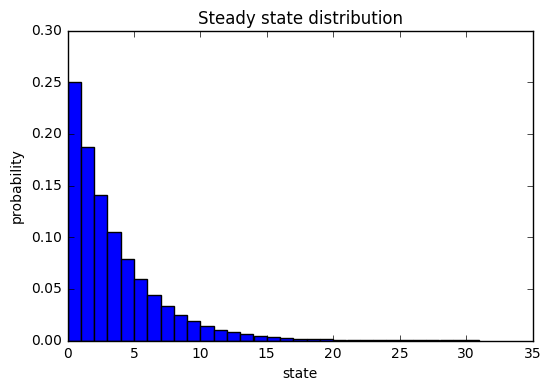

In [69]:
def steady_state( number_states, a, b ):
    """
    A function to calculate the steady state distribution for a Markov chain.
    An array with the state probabilities is returned.
    
    Arguments:
    'number_states': The number of states, not inclusive of state 0.
    'a': probability of alpha, defining probability of advancing state.
    'b': probability of beta, defining probability of lowering state.
    """
    
    #Initialise an array to hold the distribution probability values.
    distribution = [0]*(number_states + 1)
    
    #Calculate the probablility for state 0
    distribution[0] = (1 - a/b) / (1 - (a/b)**(number_states + 1) )
    
    #Use the state 0 probablility in the general formula covered in lectures to calculate other states.
    for i in range( 1, number_states + 1 ):
        distribution[i] = (a/b)**i * distribution[0]
    
    return distribution

#Plot the distribution.
x = range(0, 31)
y = steady_state( 30, 0.3, 0.4 )
plt.bar( x, y, 1)
plt.title( "Steady state distribution")
plt.xlabel('state')
plt.ylabel('probability')
plt.show()

### Part 2c)

By comparing this steady state distribution to the graph produced over 100 trials in part 2a) I can conclude that the 2a) graph of state percentages loosely resembles the steady state distribution graph. This is to be expected as we have already predicted this chain should eventually settle at a steady state (defined by this distribution graph).

We can also understand why both graphs follow the trend of having a positive skew, this is because the probability of beta is larger than the probability of alpha. This means that the state is more likely to to decrease, hence why the final state is more likely to be on the lower end of the spectrum.

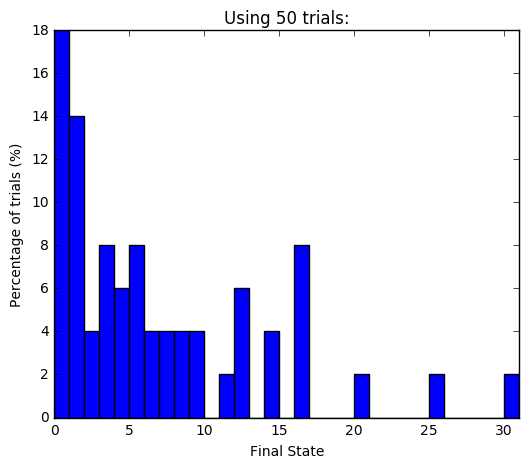

In [70]:
plt.figure(figsize=(6,5))
plt.xlim(0, 31)
plt.title( "Using 50 trials:")
plot_trials( np.arange(0, 31), 100, 0.3, 0.4, 50, False, 1 )    #Run and plot 50 trials.

By decreasing the amount of trials, the behaviour resembles the steady state even less. This is because there are not enough results to indicate the steady state accurately yet, instead the results are impacted more by the random entry and due to the lack of the number of results, extreme results affect the graph more. This graph represents the steady state to the smallest accuracy.

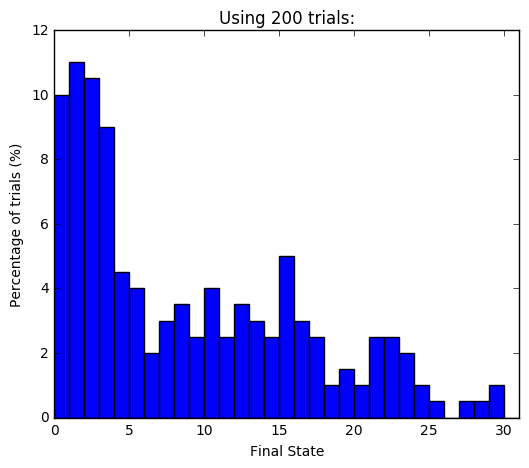

In [71]:
plt.figure(figsize=(6,5))
plt.title( "Using 200 trials:")
plt.xlim(0, 31)
plot_trials( np.arange(0, 31), 100, 0.3, 0.4, 200, False, 1 )    #Run and plot 200 trials.

Finally, by examining the graph for 200 trials we are able to see that there are enough results to reach the equilibrium of the steady state to a more precise level. Therefore this graph resembles the steady state graph to the highest accuracy.